<a href="https://colab.research.google.com/github/shishirjain/Solution-Machine-Learning-using-python.-Manaranjan-Pradhan/blob/main/Chapter_5_Classification_Machine_Learning_using_Python_by_Manaranjan_Pradhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data',index_col='row.names')

In [3]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
df.shape

(462, 10)


1. Build a logistic regression model to predict the probability of getting chd (Coronary Heart Disease), that is, P(chd = 1). Use all other columns except chd as features to build the model.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 463
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 39.7+ KB


since there is no null value, so we just need to convert 'famhist' column from object to number


In [6]:
df.famhist.value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

In [7]:
dummy={'Absent':0,
       'Present':1}

In [8]:
df['famhist']=df.famhist.map(dummy)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 463
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 39.7 KB


In [10]:
from sklearn.model_selection import train_test_split
XS_train,XS_test,y_train,y_test = train_test_split(df.loc[:,"sbp":'age'], df['chd'],test_size = 0.3, random_state = 42)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model=LogisticRegression(penalty='none',fit_intercept=False,C=1e9).fit(XS_train,y_train)
y_predict=model.predict(XS_test)

model.score(XS_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


0.7337461300309598

In [13]:
model.coef_

array([[-0.00352192,  0.07198431,  0.19040044,  0.0750047 ,  0.77583484,
         0.00553791, -0.1858416 ,  0.00153381,  0.02046429]])

In [14]:
import statsmodels.api as sm
Y=df['chd']
X=sm.add_constant(df.loc[:,'sbp':'age'])
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.3, random_state = 42)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
logit=sm.Logit(y_train,X_train)
logit_model=logit.fit()

Optimization terminated successfully.
         Current function value: 0.515459
         Iterations 6


In [16]:
pd.DataFrame(zip(XS_train.columns,np.transpose(model.coef_)),columns=['feautue','coeff'])

,feautue,coeff
0,sbp,[-0.00352192415996812]
1,tobacco,[0.07198431024138537]
2,ldl,[0.19040044232024408]
3,adiposity,[0.07500469913027098]
4,famhist,[0.7758348379717515]
5,typea,[0.005537909252126687]
6,obesity,[-0.18584160422140328]
7,alcohol,[0.0015338065665585871]
8,age,[0.020464293801625146]


In [17]:
model.get_params()

{'C': 1000000000.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': False,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

We can see that there is difference in coefficient values in bith models. This is due to difference in parameters

In [18]:
logit_model.summary2(),

(<class 'statsmodels.iolib.summary2.Summary'>
 """
                          Results: Logit
 Model:              Logit            Pseudo R-squared: 0.199     
 Dependent Variable: chd              AIC:              352.9863  
 Date:               2021-06-08 17:21 BIC:              390.7628  
 No. Observations:   323              Log-Likelihood:   -166.49   
 Df Model:           9                LL-Null:          -207.83   
 Df Residuals:       313              LLR p-value:      4.7595e-14
 Converged:          1.0000           Scale:            1.0000    
 No. Iterations:     6.0000                                       
 ------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
 ------------------------------------------------------------------
 const         -6.5732    1.5863  -4.1437  0.0000  -9.6823  -3.4640
 sbp            0.0097    0.0068   1.4272  0.1535  -0.0036   0.0230
 tobacco        0.0619    0.0319

2. Find out which features are statistically significant in the logistic regression model built in Question 1. Build a new logistic regression model using only the significant features.


In [19]:
var_df=pd.DataFrame(data=logit_model.pvalues,columns=['pvalue']).reset_index()
significant_variable=list(var_df[var_df['pvalue']<=0.05]['index'])

In [20]:
X_train[significant_variable]


,const,ldl,famhist,typea,age
row.names,,,,,
8,1.0,4.59,1,62,58
423,1.0,3.86,0,42,63
109,1.0,5.76,0,62,42
239,1.0,5.49,0,57,27
434,1.0,4.00,0,40,16
...,...,...,...,...,...
107,1.0,4.33,0,66,61
272,1.0,4.16,1,46,55
350,1.0,5.59,1,50,43


In [21]:
new_logit=sm.Logit(y_train,sm.add_constant(X_train[significant_variable])).fit()

Optimization terminated successfully.
         Current function value: 0.528087
         Iterations 6


In [22]:
new_logit.summary2(),

(<class 'statsmodels.iolib.summary2.Summary'>
 """
                          Results: Logit
 Model:              Logit            Pseudo R-squared: 0.179     
 Dependent Variable: chd              AIC:              351.1443  
 Date:               2021-06-08 17:21 BIC:              370.0326  
 No. Observations:   323              Log-Likelihood:   -170.57   
 Df Model:           4                LL-Null:          -207.83   
 Df Residuals:       318              LLR p-value:      2.5286e-15
 Converged:          1.0000           Scale:            1.0000    
 No. Iterations:     6.0000                                       
 -------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
 -------------------------------------------------------------------
 const     -6.6526     1.1139   -5.9723   0.0000   -8.8358   -4.4694
 ldl        0.2028     0.0648    3.1320   0.0017    0.0759    0.3298
 famhist    0.7004     0.26

for a unit change in age log of odds ratio is changed by 0.0592

3. From the logistic regression model parameters, determine which parameters affect the probability of chd positively and negatively.

In [23]:
logit_model.params

const       -6.573177
sbp          0.009691
tobacco      0.061930
ldl          0.206686
adiposity    0.026210
famhist      0.751933
typea        0.038671
obesity     -0.064567
alcohol      0.001122
age          0.041542
dtype: float64

obesity affect the probaility of chd negativily and rest affect positively 

4. Calculate Youden’s index for all possible cut-off probabilities ranging from 0.1to0.5 with an interval of 0.01. Find the optimal cut-off where Youden’s index is maximum.

In [24]:
from sklearn import metrics


In [25]:
Y_train_predict=new_logit.predict(sm.add_constant(X_train[significant_variable]))
Y_test_predict=new_logit.predict(sm.add_constant(X_test[significant_variable]))

In [26]:
target_df=pd.DataFrame(zip(y_test,Y_test_predict),columns=['Actual','Pred_prob'])

In [27]:
target_df.sample(10,random_state=42)

,Actual,Pred_prob
135,1,0.657565
66,0,0.465959
31,0,0.067349
118,0,0.582238
42,0,0.598367
12,0,0.406939
51,0,0.180435
68,0,0.094291
126,0,0.247063
55,1,0.223939


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


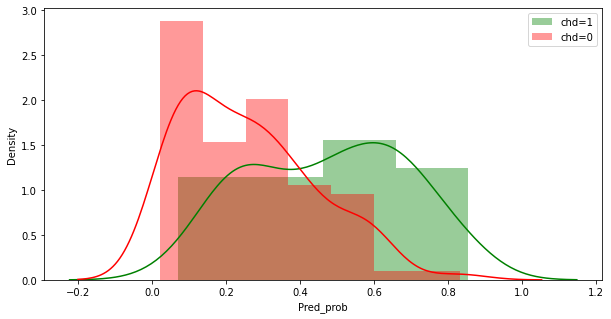

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(target_df[target_df['Actual']==1]['Pred_prob'],color='g',label='chd=1')
sns.distplot(target_df[target_df['Actual']==0]['Pred_prob'],color='r',label='chd=0')
plt.legend()
plt.show()

In [29]:
auc_score=metrics.roc_auc_score(target_df['Actual'],target_df['Pred_prob'])
auc_score

0.78140589569161

In [30]:
fpr,tpr,thresholds=metrics.roc_curve(target_df['Actual'],target_df['Pred_prob'],drop_intermediate=False)
Roc_df=pd.DataFrame(zip(fpr,tpr,thresholds),columns=['fpr','tpr','threshold'])

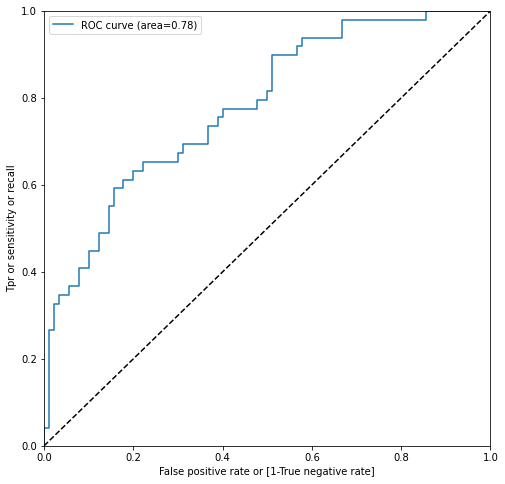

In [31]:
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)'%auc_score)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate or [1-True negative rate]')
plt.ylabel('Tpr or sensitivity or recall')
plt.legend(loc='best')
plt.show()

In [32]:
Roc_df['diff']=Roc_df.tpr-Roc_df.fpr

In [33]:
Roc_df.sort_values(by='diff',ascending=False)[0:5]

,fpr,tpr,threshold,diff
43,0.155556,0.591837,0.434413,0.436281
46,0.177778,0.612245,0.421181,0.434467
49,0.200000,0.632653,0.414076,0.432653
52,0.222222,0.653061,0.405464,0.430839
44,0.166667,0.591837,0.430871,0.425170


In [34]:
target_df['predicted']=target_df['Pred_prob'].map(lambda x: 1 if x>0.434413 else 0 )

5. Build a confusion matrix based on the cut-off probability found in Question 4 and report the precision and recall of the model for chd cases (i.e., chd = 1)

In [35]:
cm=metrics.confusion_matrix(target_df['Actual'],target_df['predicted'],[1,0])
cm

array([[28, 21],
       [14, 76]])

In [36]:
cm[1,0]

14

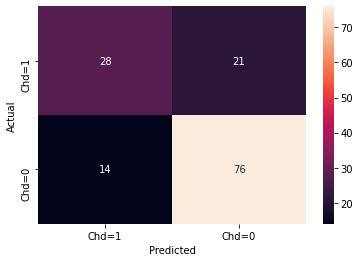

In [37]:
sns.heatmap(cm,annot=True,xticklabels=['Chd=1','Chd=0'],yticklabels=['Chd=1','Chd=0'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [38]:
print(metrics.classification_report(target_df['Actual'],target_df['predicted']))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        90
           1       0.67      0.57      0.62        49

    accuracy                           0.75       139
   macro avg       0.73      0.71      0.71       139
weighted avg       0.74      0.75      0.74       139



6. Find optimal cut-off probability using cost-based approach using the cost of FPs and FNs as defined below.
  1. Cost of predicting “chd” as “No chd” (FNs) cases is 5 times more than predicting “No chd” as “chd” (FPs).
  2. Then find the precision and recall of the model for chd = 1.

In [39]:
np.array(cm)[0,1]

21

In [40]:
def get_cost(actual,predicted,cost_fp,cost_fn):
  cm= metrics.confusion_matrix(actual,predicted,[1,0])
  return cm[0,1]*cost_fp + cm[1,0]*cost_fn

cost_df=pd.DataFrame(columns=['prob','cost'])


idx=0
for each_prob in range(10,50):
  cost=get_cost(target_df['Actual'],target_df['Pred_prob'].map(lambda x:1 if x>(each_prob/100) else 0),1,5)
  cost_df.loc[idx]=[each_prob/100, cost]
  idx+=1

In [41]:
cost_df.sort_values('cost')[0:5]

,prob,cost
39,0.49,80.0
38,0.48,85.0
37,0.47,88.0
35,0.45,91.0
34,0.44,91.0


In [42]:
target_df['new_predicted']=target_df['Pred_prob'].map(lambda x: 1 if x>0.49 else 0 )

In [43]:
print(metrics.classification_report(target_df['Actual'],target_df['new_predicted']))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        90
           1       0.69      0.49      0.57        49

    accuracy                           0.74       139
   macro avg       0.72      0.68      0.69       139
weighted avg       0.73      0.74      0.73       139



In [44]:
metrics.confusion_matrix(target_df['Actual'],target_df['new_predicted'],[1,0]),metrics.confusion_matrix(target_df['Actual'],target_df['predicted'],[1,0])

(array([[24, 25],
        [11, 79]]), array([[28, 21],
        [14, 76]]))


7. Build a decision tree classifier model to predict the probability of using Gini index and max depth as 4.

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
 clf= DecisionTreeClassifier(max_depth=4)
 clf.fit(XS_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
tree_predict=clf.predict(XS_test)
metrics.roc_auc_score(y_test,tree_predict)

0.5901360544217686

8. Compare the decision tree classifier and logistic regression model performance. Explain which
accuracy score can be used to find out which model is better in classifying chd from no chd cases.

In [48]:
metrics.confusion_matrix(target_df['Actual'],tree_predict,[1,0])
#By comapring the matrix of logit model and D-tree, we can see that TP and TN are better classified by logistic regression

array([[17, 32],
       [15, 75]])

9. Plot the decision tree and find out the most important splitting criteria at the top node. Explain how
the Gini index is derived at the top node of the decision tree classifier

In [49]:
!pip install -q pydot

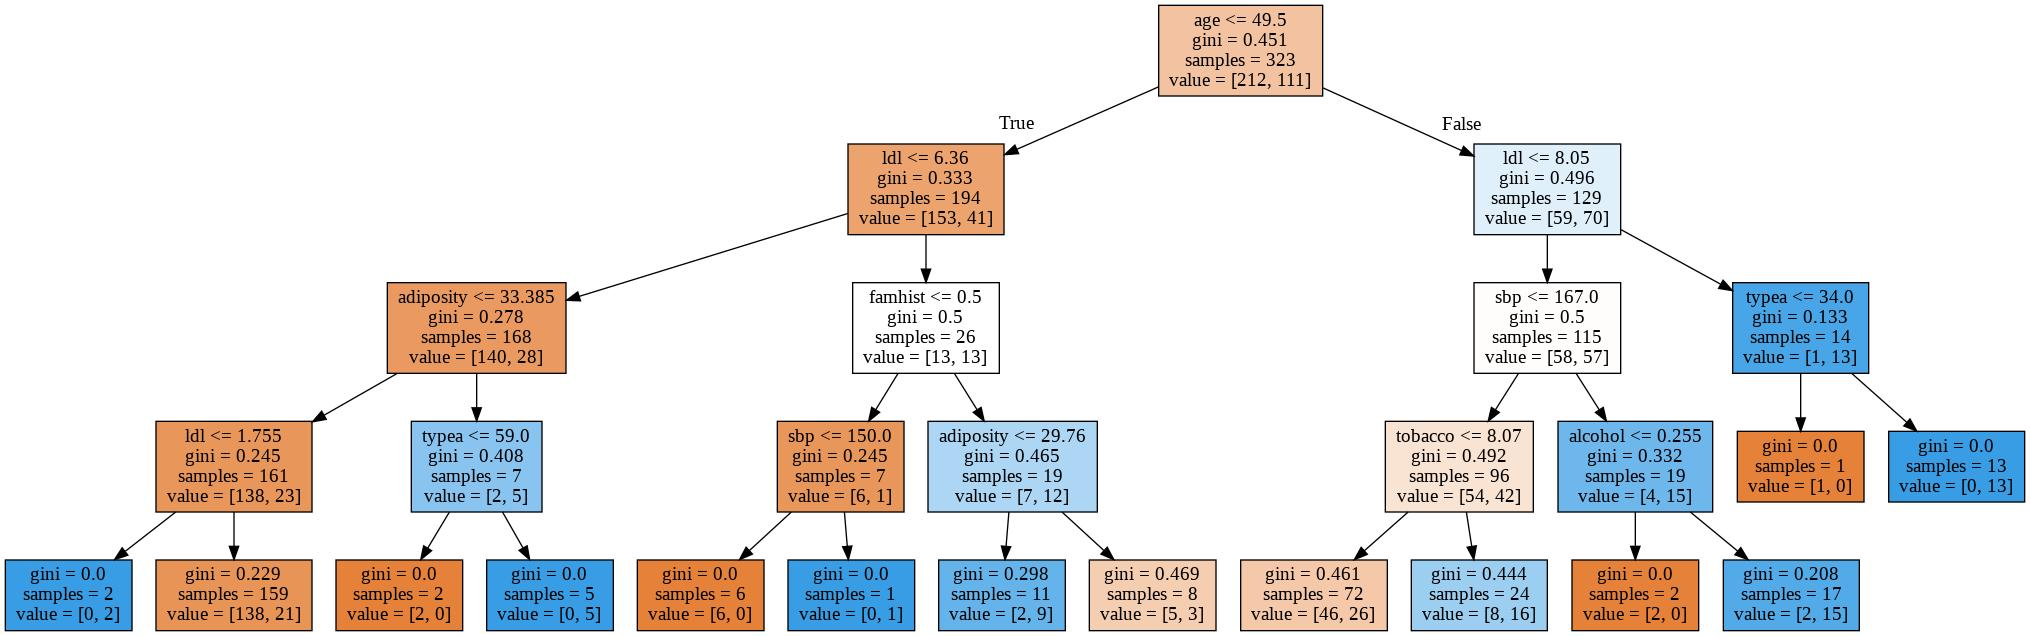

In [50]:
from sklearn.tree import export_graphviz
import pydotplus as pdot


from IPython.display import Image

# Export the tree into odt file 
export_graphviz( clf,out_file = "chd_tree.odt", feature_names = XS_train.columns, filled = True,)
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' ) 
chd_tree_graph.write_jpg( 'chd_tree.png' )
# Render the png file
Image(filename='chd_tree.png')
# From the image we can see that the most important spliting criteria is "Age" 

In [51]:

gini_node_1 = 1 - pow(212/323, 2) - pow (111/323, 2)
print( round( gini_node_1, 4))

0.4511


In [52]:
12/49

0.24489795918367346

10. Find the optimal max_depth for decision tree classifier if Gini index is used as splitting criteria.
Search possible depths ranging from 3 to 10 and use ROC and AUC as scoring to find the optimal  max_depth.


In [53]:
from sklearn.model_selection import GridSearchCV
tuned_param=[{'max_depth':range(3,11)}]
clf_gscv=GridSearchCV(clf,tuned_param,cv=6,scoring='roc_auc')
clf_gscv.fit(XS_train,y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': range(3, 11)}], pre_dispatch='2*n_jobs',
 

In [54]:
clf_gscv.best_score_

0.6117935657043845

In [55]:
clf_gscv.best_params_

{'max_depth': 4}

11. Build a logistic regression model to predict the probability of a candidate joining the company. Assume “Not Joined” as positive cases and “Joined” as negative cases.

In [57]:
hr_df=pd.read_csv('/content/hr_data.csv',index_col='SLNO')
hr_df.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
SLNO,,,,,,,,,,,,,,,,,
1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [58]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8995 entries, 1 to 12333
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                8995 non-null   int64  
 1   DOJ Extended                 8995 non-null   object 
 2   Duration to accept offer     8995 non-null   int64  
 3   Notice period                8995 non-null   int64  
 4   Offered band                 8995 non-null   object 
 5   Pecent hike expected in CTC  8995 non-null   float64
 6   Percent hike offered in CTC  8995 non-null   float64
 7   Percent difference CTC       8995 non-null   float64
 8   Joining Bonus                8995 non-null   object 
 9   Candidate relocate actual    8995 non-null   object 
 10  Gender                       8995 non-null   object 
 11  Candidate Source             8995 non-null   object 
 12  Rex in Yrs                   8995 non-null   int64  
 13  LOB              

In [59]:
encoded_df=pd.get_dummies(hr_df.iloc[:,1:-1])

In [60]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8995 entries, 1 to 12333
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Duration to accept offer            8995 non-null   int64  
 1   Notice period                       8995 non-null   int64  
 2   Pecent hike expected in CTC         8995 non-null   float64
 3   Percent hike offered in CTC         8995 non-null   float64
 4   Percent difference CTC              8995 non-null   float64
 5   Rex in Yrs                          8995 non-null   int64  
 6   Age                                 8995 non-null   int64  
 7   DOJ Extended_No                     8995 non-null   uint8  
 8   DOJ Extended_Yes                    8995 non-null   uint8  
 9   Offered band_E0                     8995 non-null   uint8  
 10  Offered band_E1                     8995 non-null   uint8  
 11  Offered band_E2                     8995 n

In [61]:
encoded_df.drop(columns=['DOJ Extended_Yes','Gender_Female','Joining Bonus_No'],inplace=True)

In [62]:
Y_hr=hr_df['Status'].map({'Joined':0,'Not Joined':1})
X_hr=sm.add_constant(encoded_df)

In [63]:
Xhr_train,Xhr_test,yhr_train,yhr_test=train_test_split(X_hr,Y_hr,test_size=0.3,random_state=42)

In [64]:
logit_hr=sm.Logit(yhr_train,Xhr_train)


In [65]:
logit_hrmodel=logit_hr.fit()

         Current function value: 0.410801
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


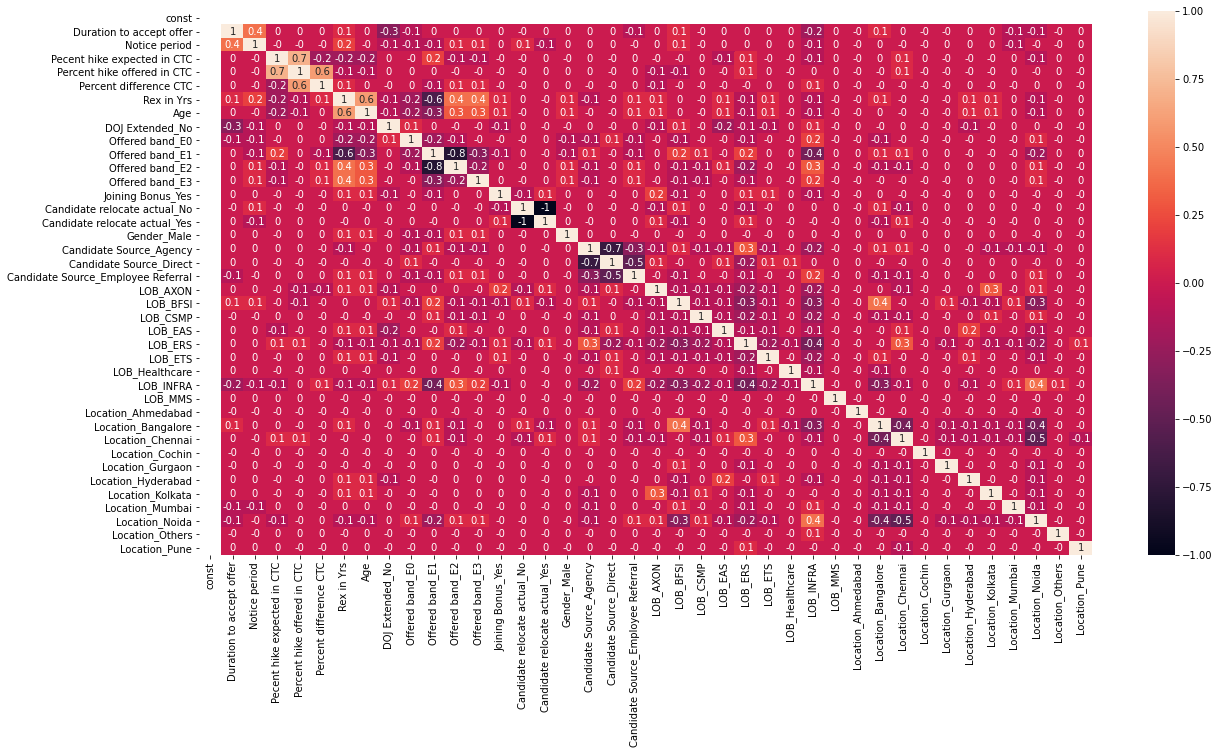

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(round(Xhr_train.corr(),1),annot=True,)

In [67]:
print(logit_hrmodel.summary2())


                                          Results: Logit
Model:                          Logit                      Pseudo R-squared:           0.142      
Dependent Variable:             Status                     AIC:                        5242.8110  
Date:                           2021-06-08 17:22           BIC:                        5478.9794  
No. Observations:               6296                       Log-Likelihood:             -2586.4    
Df Model:                       34                         LL-Null:                    -3014.0    
Df Residuals:                   6261                       LLR p-value:                1.2661e-157
Converged:                      0.0000                     Scale:                      1.0000     
No. Iterations:                 35.0000                                                           
--------------------------------------------------------------------------------------------------
                                    Coef.     Std.Er

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [68]:
hr_pvaluedf=pd.DataFrame(logit_hrmodel.pvalues,columns=['pvalue']).reset_index()

#hr_pvaluedf.columns=['var','pvalue']
hr_pvaluedf[hr_pvaluedf['pvalue']<=0.05]


,index,pvalue
2,Notice period,2.520078e-38
7,Age,1.107685e-03


13. Assume the following costs to find optimal cut-off probability to determine if a candidate will join or not.
  1. Cost of predicting “Not Joining” as “Joining” (FPs) cases is 3 times more than predicting “Joining” as “Not Joining” (FNs).

In [69]:
significant_var=['Notice period', 'Age']

In [70]:
hr_signif_logit=sm.Logit(yhr_train,sm.add_constant(Xhr_train[significant_var])).fit()

Optimization terminated successfully.
         Current function value: 0.458954
         Iterations 6


In [71]:
yhr_predict_df=pd.DataFrame({'actual_hr':yhr_test,'hr_pred_prob':hr_signif_logit.predict(sm.add_constant(Xhr_test[significant_var]))})

In [73]:
yhr_predict_df.head()

,actual_hr,hr_pred_prob
SLNO,,
6138,0,0.142361
2225,0,0.084806
11749,0,0.073455
3192,0,0.175638
891,0,0.171166


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


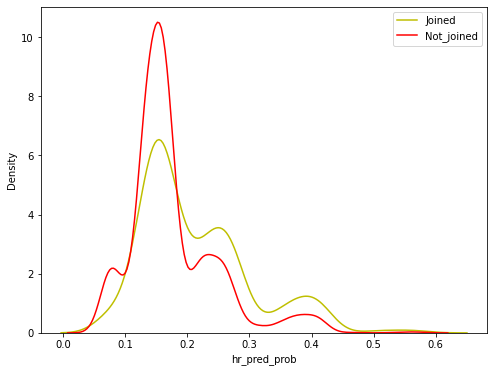

In [84]:
plt.figure(figsize=(8,6))
sns.distplot(yhr_predict_df[yhr_predict_df['actual_hr']==1]['hr_pred_prob'],color='y',label='Joined',hist=False)
sns.distplot(yhr_predict_df[yhr_predict_df['actual_hr']==0]['hr_pred_prob'],color='r',label='Not_joined',hist=False)
plt.legend()
plt.show()

In [77]:
yhr_predict_df_without_sig_var=pd.DataFrame({'actual_hr':yhr_test,'hr_pred_prob':logit_hrmodel.predict(sm.add_constant(Xhr_test))})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


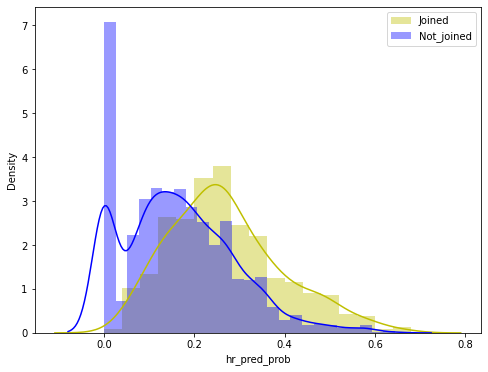

In [86]:
plt.figure(figsize=(8,6))
sns.distplot(yhr_predict_df_without_sig_var[yhr_predict_df_without_sig_var['actual_hr']==1]['hr_pred_prob'],color='y',label='Joined')
sns.distplot(yhr_predict_df_without_sig_var[yhr_predict_df_without_sig_var['actual_hr']==0]['hr_pred_prob'],color='b',label='Not_joined')
plt.legend()
plt.show()

In [109]:
def get_cost(actual,predicted,cost_fp,cost_fn):
  cm= metrics.confusion_matrix(actual,predicted,[1,0])
  return cm[0,1]*cost_fp + cm[1,0]*cost_fn

cost_df=pd.DataFrame(columns=['prob','cost'])


idx=0
for each_prob in range(100,500):
  cost=get_cost(yhr_predict_df['actual_hr'],yhr_predict_df['hr_pred_prob'].map(lambda x:1 if x>(each_prob/1000) else 0),3,1)
  cost_df.loc[idx]=[each_prob/1000, cost]
  idx+=1

In [110]:
cost_df_2=pd.DataFrame(columns=['prob','cost'])


idx=0
for each_prob in range(100,500):
  cost=get_cost(yhr_predict_df_without_sig_var['actual_hr'],yhr_predict_df_without_sig_var['hr_pred_prob'].map(lambda x:1 if x>(each_prob/1000) else 0),3,1)
  cost_df_2.loc[idx]=[each_prob/1000, cost]
  idx+=1

In [114]:
print(cost_df.sort_values('cost')[0:5]),

      prob    cost
163  0.263  1378.0
161  0.261  1379.0
154  0.254  1379.0
155  0.255  1379.0
156  0.256  1379.0


(None,)

In [113]:
cost_df_2.sort_values('cost')[0:5]

,prob,cost
112,0.212,1229.0
111,0.211,1229.0
110,0.210,1231.0
109,0.209,1231.0
116,0.216,1233.0


14. Build a confusion matrix based on the cut-off probability found in Question 13 and report the precision and recall of the model for joining cases.

In [115]:
metrics.confusion_matrix(yhr_predict_df_without_sig_var['actual_hr'],yhr_predict_df_without_sig_var['hr_pred_prob'].map(lambda x:1 if x> 0.212 else 0),[1,0])

array([[ 343,  175],
       [ 704, 1477]])

In [116]:
metrics.confusion_matrix(yhr_predict_df['actual_hr'],yhr_predict_df['hr_pred_prob'].map(lambda x:1 if x> 0.263 else 0),[1,0])

array([[ 134,  384],
       [ 226, 1955]])

15. HR wants to understand the key parameters effecting the joining of candidates. So, build a decision tree with optimal parameters and provide some rules to HR for building strategies to ensure candi- dates offered job most likely will join the company in future.

In [122]:
 clf_tree= DecisionTreeClassifier(max_depth=4)
 clf_tree.fit(Xhr_train,yhr_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [126]:
tree_hrpredict=clf_tree.predict(Xhr_test)
metrics.roc_auc_score(yhr_test,tree_hrpredict)

0.5065275041203515

In [125]:
metrics.confusion_matrix(yhr_test,tree_hrpredict,[1,0])
#it's a very bad model
#never follow guidelines :D

array([[   7,  511],
       [   1, 2180]])

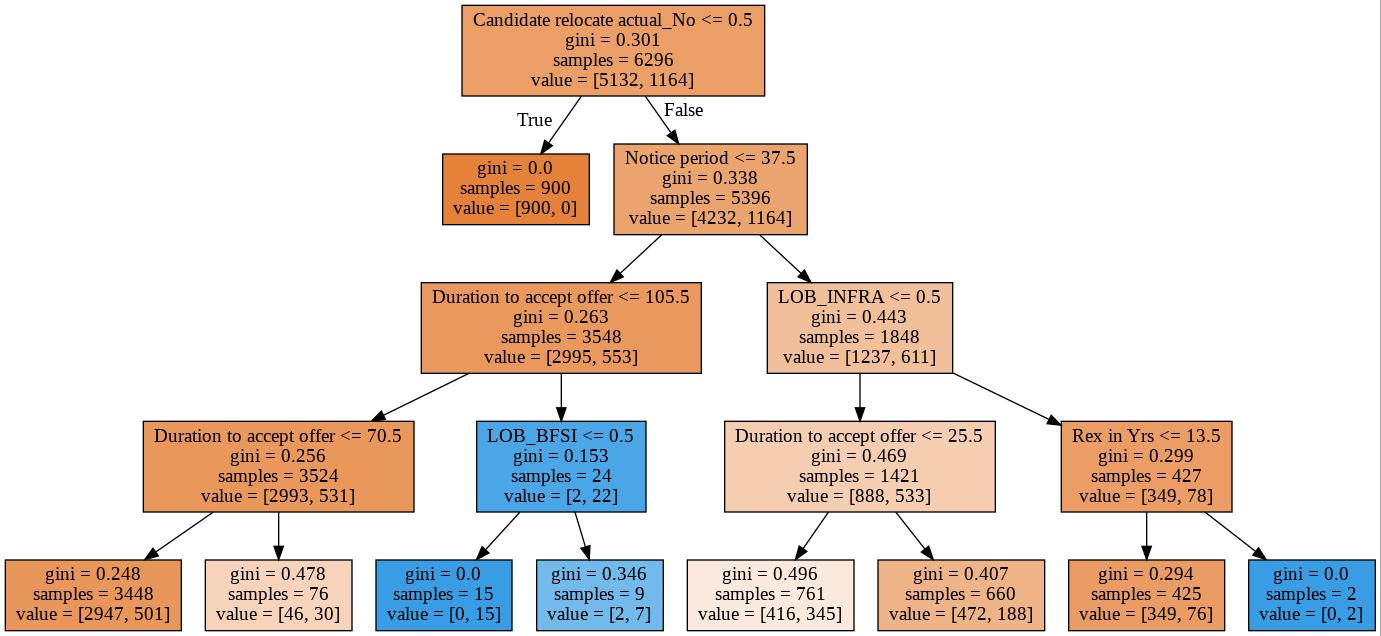

In [120]:
from sklearn.tree import export_graphviz
import pydotplus as pdot


from IPython.display import Image

# Export the tree into odt file 
export_graphviz( clf_tree,out_file = "hr_analytics.odt", feature_names = Xhr_train.columns, filled = True,)
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'hr_analytics.odt' ) 
chd_tree_graph.write_jpg( 'hr_analytics.png' )
# Render the png file
Image(filename='hr_analytics.png')
# From the image we can see that the most important spliting criteria is "Candidate relocate" which is intuitive also. 
#2nd important parameter for not joining is notice period
#So the startegies would include selecting candidates who are nearby to city and there notice period should be less than 45 days